In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import os
import numpy as np
import tensorflow as tf
import skimage.io as io
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.utils import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import *
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import random

In [4]:
X_train = pd.read_csv('/content/drive/MyDrive/project_final/X_train.csv')
X_train = X_train.drop(X_train.columns[0], axis = 1)
X_train = np.array(X_train)

In [5]:
Y_train = pd.read_csv('/content/drive/MyDrive/project_final/Y_train.csv')
Y_train = Y_train.drop(Y_train.columns[0], axis = 1)
Y_train = np.array(Y_train)

In [7]:
X_test = pd.read_csv('/content/drive/MyDrive/project_final/X_test.csv')
X_test = X_test.drop(X_test.columns[0], axis = 1)
X_test = np.array(X_test)

In [8]:
Y_test = pd.read_csv('/content/drive/MyDrive/project_final/Y_test.csv')
Y_test = Y_test.drop(Y_test.columns[0], axis = 1)
Y_test = np.array(Y_test)

In [9]:
print(X_train.shape)

(78200, 1024)


In [10]:
X_train=X_train.reshape(78200,32,32,1)
print(X_train.shape)

(78200, 32, 32, 1)


In [11]:

print(Y_train.shape)

(78200, 1)


In [12]:
print(X_test.shape)

(13800, 1024)


In [13]:
X_test=X_test.reshape(13800,32,32,1)
print(X_test.shape)


(13800, 32, 32, 1)


In [14]:
print(Y_test.shape)


(13800, 1)


In [15]:
#the 46 classes for characters and digits
classes = np.load('/content/drive/MyDrive/project_final/Classes.npy',allow_pickle=True).item()
print(classes)

{37: 0, 38: 1, 39: 2, 40: 3, 41: 4, 42: 5, 43: 6, 44: 7, 45: 8, 46: 9, 10: 'yna', 11: 'taamatar', 12: 'thaa', 13: 'daa', 14: 'dhaa', 15: 'adna', 16: 'tabala', 17: 'tha', 18: 'da', 19: 'dha', 1: 'ka', 20: 'na', 21: 'pa', 22: 'pha', 23: 'ba', 24: 'bha', 25: 'ma', 26: 'yaw', 27: 'ra', 28: 'la', 29: 'waw', 2: 'kha', 30: 'motosaw', 31: 'petchiryakha', 32: 'patalosaw', 33: 'ha', 34: 'chhya', 35: 'tra', 36: 'gya', 3: 'ga', 4: 'gha', 5: 'kna', 6: 'cha', 7: 'chha', 8: 'ja', 9: 'jha'}


In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
X_train, Y_train = shuffle(X_train, Y_train, random_state = 5)
X_test, Y_test = shuffle(X_test, Y_test, random_state =2)

bha


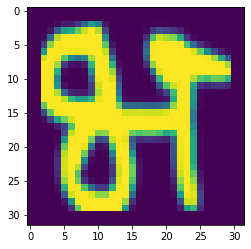

In [18]:
plt.imshow(tf.squeeze(X_test[0]))
print(classes[int(Y_test[0])])

In [19]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size = 0.6, random_state = 1)
print(X_test.shape)
print(X_val.shape)

(5520, 32, 32, 1)
(8280, 32, 32, 1)


In [20]:
Y_test = to_categorical(Y_test)
print(Y_test.shape)

(5520, 47)


In [21]:
Y_val = to_categorical(Y_val)
print(Y_val.shape)


(8280, 47)


In [22]:
Y_train = to_categorical(Y_train)
print(Y_train.shape)

(78200, 47)


In [39]:
inputs = Input(shape = (32,32,1))
conv1 = Conv2D(64, 3, padding='same', activation='tanh')(inputs)
conv1 = BatchNormalization()(conv1)
pool1 = MaxPooling2D((2,2))(conv1)
conv2 = Conv2D(128, 3, padding='same', activation='tanh')(pool1)
conv2=BatchNormalization()(conv2)
pool2 = MaxPooling2D((2,2))(conv2)
conv3 = Conv2D(256, 5, padding='same', activation='tanh')(pool2)
conv3=BatchNormalization()(conv3)
pool3 = MaxPooling2D((2,2))(conv3)
flat = Flatten()(pool3)
dense1=Dense(512,activation='relu')(flat)
dense2 = Dense(256, activation='relu')(dense1)
dense3 = Dense(128, activation='relu')(dense2)
dense4 = Dense(47, activation='softmax')(dense3)

model = Model(inputs, dense4)
print(model.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_13 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 128)         0   

In [40]:
model.compile('Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 15, batch_size = 200, validation_data = (X_val, Y_val), verbose = 1)

Epoch 1/15
391/391 [==============================] - 11s 25ms/step - loss: 1.4244 - accuracy: 0.6282 - val_loss: 2.2004 - val_accuracy: 0.4868
Epoch 2/15
391/391 [==============================] - 10s 25ms/step - loss: 0.1114 - accuracy: 0.9657 - val_loss: 0.7443 - val_accuracy: 0.7740
Epoch 3/15
391/391 [==============================] - 10s 25ms/step - loss: 0.0697 - accuracy: 0.9780 - val_loss: 0.2203 - val_accuracy: 0.9295
Epoch 4/15
391/391 [==============================] - 10s 25ms/step - loss: 0.0529 - accuracy: 0.9824 - val_loss: 0.3066 - val_accuracy: 0.9064
Epoch 5/15
391/391 [==============================] - 10s 25ms/step - loss: 0.0452 - accuracy: 0.9850 - val_loss: 0.3544 - val_accuracy: 0.8913
Epoch 6/15
391/391 [==============================] - 10s 26ms/step - loss: 0.0389 - accuracy: 0.9873 - val_loss: 0.1967 - val_accuracy: 0.9449
Epoch 7/15
391/391 [==============================] - 10s 26ms/step - loss: 0.0383 - accuracy: 0.9879 - val_loss: 0.0996 - val_accuracy:

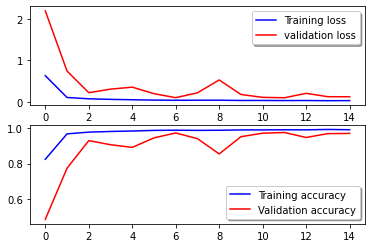

In [41]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


In [42]:
model.evaluate(X_test, Y_test, batch_size =200 , verbose =1)

28/28 [==============================] - 0s 14ms/step - loss: 0.0888 - accuracy: 0.9768


[0.08884512633085251, 0.9768115878105164]

In [69]:
predicted = model.predict(x = X_test, verbose = 1)


173/173 [==============================] - 1s 3ms/step


predicted 
tabala
expected
tabala


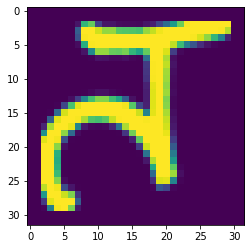

In [70]:
index = random.randint(0,5520)
img = X_test[index]
img = img.reshape((32,32))
plt.imshow(img)
predicted = np.argmax(predicted, axis = 1)
print("predicted ")
print(classes[predicted[index]])
print("expected")
print(classes[Y_test[index]])

In [71]:
model.save('My_Model_1.h5')